In [ ]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()


Saving Real estate.csv to Real estate.csv


In [ ]:
estate_df = pd.read_csv('Real estate.csv')
display(estate_df.shape)
estate_df.tail()

(414, 8)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
labels = estate_df['Y house price of unit area']
estate_df = estate_df.drop(columns=['Y house price of unit area','No'])

#categorical_variables = ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station',	'X4 number of convenience stores',	'X5 latitude',	'X6 longitude']
#estate_df_cat = estate_df[categorical_variables]
#estate_df_cat.head()



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features_np = sc.fit_transform(estate_df)
scaled_features = pd.DataFrame(scaled_features_np)
estate_df_scaled = pd.concat((scaled_features, estate_df), axis = 1)
scaled_features.head()

,0,1,2,3,4,5
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [ ]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(estate_df_scaled, labels, test_size=62, random_state=42)

print("Full train data shape:", X.shape, "Full train label shape:", y.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

Full train data shape: (352, 12) Full train label shape: (352,) Test data shape: (62, 12) Test label shape: (62,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=62, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)
# 62/290 ~= 15/70


Train data shape: (290, 12) Train label shape: (290,) Validation data shape: (62, 12) Validation label shape: (62,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

a =  [2, 4, 6, 8, 10]
b = [2, 4, 6, 8, 10]

for i in range(1,6):
  #estate_df_scaled = pd.concat((scaled_features, estate_df), axis = 1)
  poly_reg = PolynomialFeatures(degree=i)
  
  X_poly_train = poly_reg.fit_transform(X_train)
  X_poly_train.shape
  lin_reg = LinearRegression()
 
  lin_reg.fit(X_poly_train, y_train)
  y_pred = lin_reg.predict(X_poly_train)
  a[i-1] = mean_squared_error(y_train, y_pred)

  X_poly_valid = poly_reg.transform(X_valid)
  y_pred = lin_reg.predict(X_poly_valid)
  b[i-1] = mean_squared_error(y_valid, y_pred)


In [ ]:
b

[51.87376353466798,
 467.30189851900485,
 252.5250310237946,
 341313.4288108747,
 10415475.208372397]

In [ ]:
a

[86.37233310780869,
 496.3947543323004,
 42.89914823255867,
 24.246324997541205,
 3.0148836863291795]

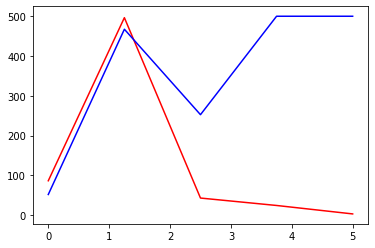

In [ ]:
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt

b[3] = 500
b[4] = 500 #so that graph's details are visible

t = linspace(0, 5, 5)
c = np.array(a)
d = np.array(b)


plt.plot(t, c, 'r') 
plt.plot(t, d, 'b') 

plt.show()

In [ ]:
data = np.array(estate_df)
covMatrix = np.cov(data,bias=True)
print (covMatrix)

[[534058.38612635 523903.18444752 512085.11407035 ... 519993.26397846
  534797.65586489 535487.35080203]
 [523903.18444752 520762.94497396 516973.76886189 ... 519498.38891542
  525481.07634905 525709.20674   ]
 [512085.11407035 516973.76886189 522385.21114917 ... 518742.6413565
  514600.21374933 514294.56570936]
 ...
 [519993.26397846 519498.38891542 518742.6413565  ... 519234.30999109
  521876.17625502 521927.40348395]
 [534797.65586489 525481.07634905 514600.21374933 ... 521876.17625502
  535700.30341498 536342.53314759]
 [535487.35080203 525709.20674    514294.56570936 ... 521927.40348395
  536342.53314759 537018.59970169]]


In [ ]:
def function(p):
  X, X_test, y, y_test = train_test_split(estate_df_scaled, labels, test_size=62, random_state=42)
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=62, random_state=42)
  
  k = 1
  a =  [2, 4, 6, 8, 10]
  b = [2, 4, 6, 8, 10]

  
  #estate_df_scaled = pd.concat((scaled_features, estate_df), axis = 1)
  poly_reg = PolynomialFeatures(degree=1)
  
  X_poly_train = poly_reg.fit_transform(X_train)
  X_poly_train.shape
  lin_reg = LinearRegression()

  lin_reg.fit(X_poly_train, y_train)
  y_pred = lin_reg.predict(X_poly_train)
  a[i-1] = mean_squared_error(y_train, y_pred)

  X_poly_valid = poly_reg.transform(X_valid)
  y_pred = lin_reg.predict(X_poly_valid)
  b[i-1] = mean_squared_error(y_valid, y_pred)
  
  b[3] = p
  b[4] = p #so that graph's details are visible

  t = linspace(0, 5, 5)
  c = np.array(a)
  d = np.array(b)


  plt.plot(t, c, 'r') 
  plt.plot(t, d, 'b') 

  plt.show()
    

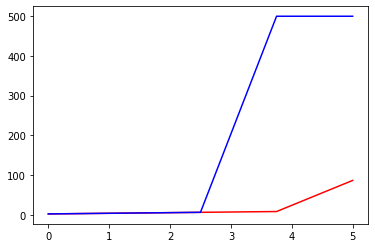

In [ ]:
function(500)

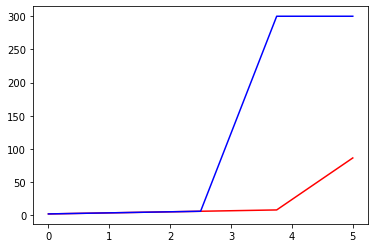

In [ ]:
estate_df_scaled = estate_df_scaled.drop(columns=['X1 transaction date'])
function(300)


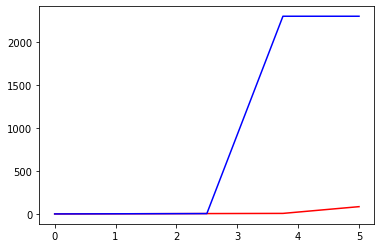

In [ ]:
estate_df_scaled = estate_df_scaled.drop(columns=['X4 number of convenience stores'])
function(2300)

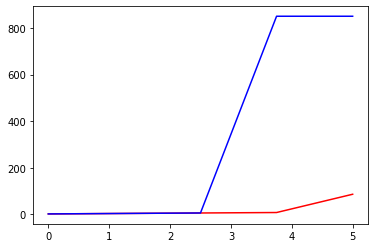

In [ ]:
estate_df_scaled = estate_df_scaled.drop(columns=['X5 latitude'])
function(850)

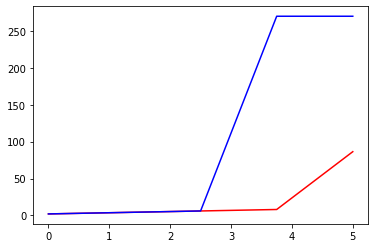

In [ ]:
estate_df_scaled = estate_df_scaled.drop(columns=['X6 longitude'])
function(270)

A house price prediction problem is a straightforward question of what features do people care about when buying a house which in turn increase a house's price. So, to answer this question I first asked myself about what I care when I'm buying a house and features such as longtitude, lattitude, transaction date and number of conveince stores were unimportant as long as they did not show any extremities such as not having any convenience store around or being on top of a mountain. 

From this reasoning, I first scaled features as they were numerical values of different origins. There are no missing values however first column 'No' is useless and harmful for machine learning so I discarded the column. House price was picked as the output.

Train test split is 75-15-15

Best results were obtained at degree(p) 1 as only two features(dropped = 3), X2 and X3 had significance on the data and around degree 1(which 3 would be dropped out of 4 remaining feautures did not matter) , MSS's of test and validation sets were consistent with each other. This makes sense considering f(x) = w0 + w1x for two variables. Also, a linear relation between house prices and distance to nearest metro station for example is expected.

As a result house age turned out to be the most important factor determining a house's price. Closeness to a metro station followed after but with less significance. I believe this makes sense because in rural accomodations where nearest metro station is in the city and more or less equally far to every spot so it is only natural for it to matter less. But on the other hand in busy cities being close to a metro station is an important advantage and is usually a sign of a developed neighbourhood which gives it importance.

